# DL Lab 9
# Shresht mishra
# 211020450

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [2]:
df=pd.read_csv('D:/DL/Dataset/stock/RELIANCE.csv',na_values=['null'],
               index_col='Date',parse_dates=True,infer_datetime_format=True)

C:\Users\shres\AppData\Local\Temp\ipykernel_5076\2804956208.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv('D:/DL/Dataset/stock/RELIANCE.csv',na_values=['null'],


## 2. Preprocessing 

In [3]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [4]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2.456000e+03,4.792000e+03,4792.000000
mean,1010.984866,1012.602375,1026.823803,996.886977,1011.157143,1011.316839,1011.937409,5.583028e+06,6.076715e+14,1.452306e+05,2.280885e+06,0.435039
std,570.987079,572.575893,581.986757,560.703328,570.938608,571.046753,571.222520,4.983793e+06,8.369739e+14,1.297557e+05,1.882665e+06,0.144722
min,203.200000,205.500000,219.500000,197.150000,203.300000,203.200000,212.290000,5.282000e+04,4.295543e+12,2.991000e+03,2.909700e+04,0.076300
25%,572.137500,572.925000,582.950000,564.237500,572.062500,572.512500,573.190000,2.836454e+06,2.203354e+14,7.215900e+04,1.194524e+06,0.323325
50%,937.950000,939.000000,950.075000,927.550000,939.025000,938.275000,939.785000,4.213432e+06,3.662999e+14,1.021435e+05,1.810434e+06,0.449450
75%,1247.387500,1247.675000,1267.350000,1227.450000,1248.287500,1248.275000,1247.375000,6.602604e+06,6.656490e+14,1.686702e+05,2.752935e+06,0.544300
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.473434e+16,1.428490e+06,3.495888e+07,0.978300


In [5]:
df.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

<Axes: xlabel='Date'>

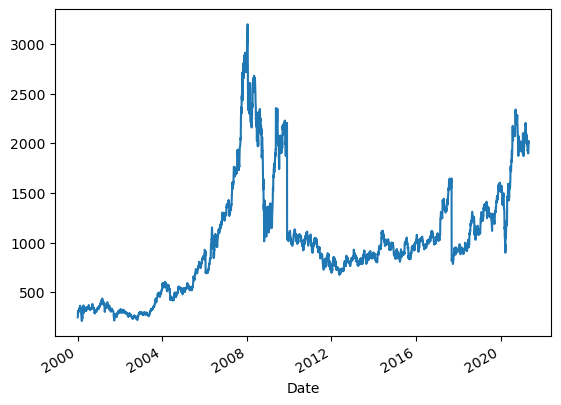

In [6]:
df['VWAP'].plot()

In [7]:
#Set Target Variable
output_var = pd.DataFrame(df['VWAP'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2000-01-03,0.010348,0.010460,0.013705,0.067563
2000-01-04,0.017106,0.017005,0.018392,0.144758
2000-01-05,0.016540,0.022219,0.020210,0.410888
2000-01-06,0.027001,0.026376,0.031197,0.239796
2000-01-07,0.028941,0.031964,0.032556,0.304062


In [9]:
feature_transform.shape

(5306, 4)

In [10]:
from sklearn.model_selection import TimeSeriesSplit
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10) # 90-10%
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [11]:
print(X_train.shape)
print(X_test.shape)

(4824, 4)
(482, 4)


In [12]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape)
print(X_test.shape)

(4824, 1, 4)
(482, 1, 4)


## LSTM architecture

In [48]:
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=True))
lstm.add(tf.keras.layers.Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [49]:
history=lstm.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, shuffle=False)

Epoch 1/50
603/603 [==============================] - 2s 3ms/step - loss: 1181597.5000
Epoch 2/50
603/603 [==============================] - 2s 3ms/step - loss: 1130126.0000
Epoch 3/50
603/603 [==============================] - 2s 4ms/step - loss: 1041582.5625
Epoch 4/50
603/603 [==============================] - 2s 4ms/step - loss: 931868.3125
Epoch 5/50
603/603 [==============================] - 2s 4ms/step - loss: 812459.4375
Epoch 6/50
603/603 [==============================] - 2s 4ms/step - loss: 691449.1250
Epoch 7/50
603/603 [==============================] - 2s 4ms/step - loss: 575025.2500
Epoch 8/50
603/603 [==============================] - 3s 4ms/step - loss: 467959.3438
Epoch 9/50
603/603 [==============================] - 3s 4ms/step - loss: 373738.0625
Epoch 10/50
603/603 [==============================] - 3s 4ms/step - loss: 294542.8438
Epoch 11/50
603/603 [==============================] - 3s 4ms/step - loss: 231189.4062
Epoch 12/50
603/603 [============================

## Results with various learning rates.

In [50]:
learning_rates = [0.001, 0.01, 0.1]
history_dict = {}
for lr in learning_rates:
    lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mean_squared_error', metrics=['mae', 'mse'])
    history = lstm.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, shuffle=False)
    history_dict[lr] = history

Epoch 1/50
603/603 [==============================] - 3s 5ms/step - loss: 2979.0791 - mae: 31.2935 - mse: 2979.0791
Epoch 2/50
603/603 [==============================] - 3s 5ms/step - loss: 2923.1409 - mae: 30.4806 - mse: 2923.1409
Epoch 3/50
603/603 [==============================] - 3s 5ms/step - loss: 2906.9180 - mae: 30.2071 - mse: 2906.9180
Epoch 4/50
603/603 [==============================] - 3s 5ms/step - loss: 2895.4719 - mae: 30.0328 - mse: 2895.4719
Epoch 5/50
603/603 [==============================] - 3s 5ms/step - loss: 2883.8196 - mae: 29.8684 - mse: 2883.8196
Epoch 6/50
603/603 [==============================] - 3s 5ms/step - loss: 2871.0007 - mae: 29.6923 - mse: 2871.0007
Epoch 7/50
603/603 [==============================] - 3s 5ms/step - loss: 2856.9375 - mae: 29.4989 - mse: 2856.9375
Epoch 8/50
603/603 [==============================] - 3s 4ms/step - loss: 2841.7598 - mae: 29.2875 - mse: 2841.7598
Epoch 9/50
603/603 [==============================] - 3s 4ms/step - loss

603/603 [==============================] - 3s 5ms/step - loss: 3925.0635 - mae: 35.3655 - mse: 3925.0635
Epoch 42/50
603/603 [==============================] - 3s 5ms/step - loss: 4016.8760 - mae: 36.0666 - mse: 4016.8760
Epoch 43/50
603/603 [==============================] - 3s 5ms/step - loss: 3986.7380 - mae: 35.9868 - mse: 3986.7380
Epoch 44/50
603/603 [==============================] - 3s 5ms/step - loss: 3899.7439 - mae: 35.1643 - mse: 3899.7439
Epoch 45/50
603/603 [==============================] - 3s 5ms/step - loss: 3824.5088 - mae: 34.5199 - mse: 3824.5088
Epoch 46/50
603/603 [==============================] - 3s 5ms/step - loss: 3766.1421 - mae: 34.3073 - mse: 3766.1421
Epoch 47/50
603/603 [==============================] - 3s 5ms/step - loss: 3708.2732 - mae: 34.3001 - mse: 3708.2732
Epoch 48/50
603/603 [==============================] - 2s 4ms/step - loss: 3643.3594 - mae: 33.9859 - mse: 3643.3594
Epoch 49/50
603/603 [==============================] - 2s 4ms/step - loss: 3

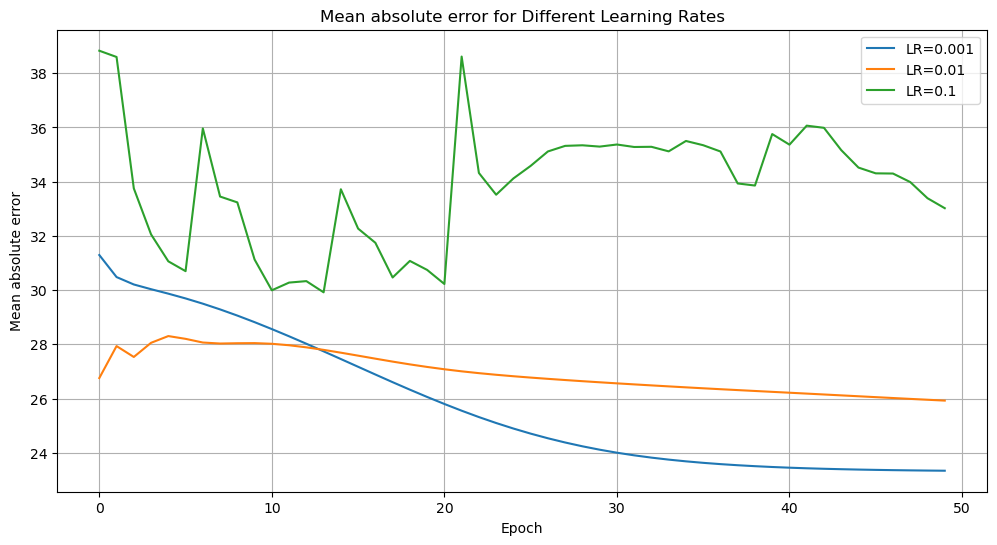

In [51]:
plt.figure(figsize=(12, 6))
for lr, history in history_dict.items():
    plt.plot(history.history['mae'], label=f'LR={lr}')
plt.xlabel('Epoch')
plt.ylabel('Mean absolute error')
plt.title('Mean absolute error for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()

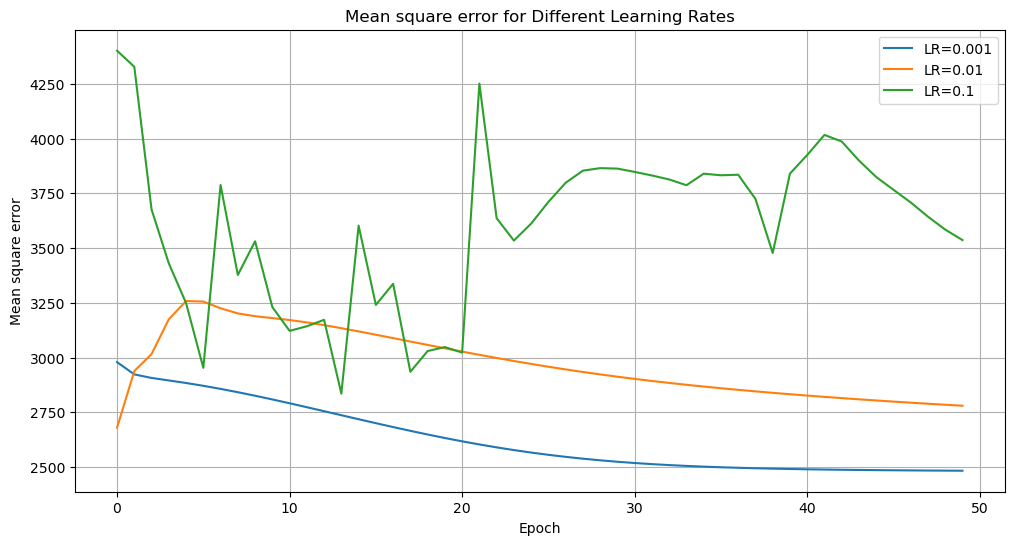

In [52]:
plt.figure(figsize=(12, 6))
for lr, history in history_dict.items():
    plt.plot(history.history['mse'], label=f'LR={lr}')
plt.xlabel('Epoch')
plt.ylabel('Mean square error')
plt.title('Mean square error for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()

## Results with various Activation functions.

In [54]:
activation_functions = ['relu', 'sigmoid', 'tanh']
history_dict_act = {}
for activation_func in activation_functions:
    lstm_act = tf.keras.Sequential()
    lstm_act.add(tf.keras.layers.LSTM(32, input_shape=(1, trainX.shape[1]), activation=activation_func, return_sequences=False))
    lstm_act.add(tf.keras.layers.Dense(1))
    lstm_act.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae', 'mse'])
    history_act = lstm.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, shuffle=False)
    history_dict_act[activation_func] = history_act

Epoch 1/50
603/603 [==============================] - 5s 8ms/step - loss: 1217.2662 - mae: 24.6646 - mse: 1217.2662
Epoch 2/50
603/603 [==============================] - 4s 7ms/step - loss: 1214.2389 - mae: 24.5037 - mse: 1214.2389
Epoch 3/50
603/603 [==============================] - 5s 8ms/step - loss: 1211.4308 - mae: 24.3392 - mse: 1211.4308
Epoch 4/50
603/603 [==============================] - 4s 7ms/step - loss: 1208.7596 - mae: 24.1807 - mse: 1208.7596
Epoch 5/50
603/603 [==============================] - 4s 7ms/step - loss: 1206.0798 - mae: 24.0240 - mse: 1206.0798
Epoch 6/50
603/603 [==============================] - 4s 7ms/step - loss: 1203.2111 - mae: 23.8705 - mse: 1203.2111
Epoch 7/50
603/603 [==============================] - 5s 7ms/step - loss: 1199.9945 - mae: 23.7114 - mse: 1199.9945
Epoch 8/50
603/603 [==============================] - 5s 8ms/step - loss: 1196.3866 - mae: 23.5542 - mse: 1196.3866
Epoch 9/50
603/603 [==============================] - 5s 8ms/step - loss

603/603 [==============================] - 4s 7ms/step - loss: 274.8564 - mae: 8.8788 - mse: 274.8564
Epoch 41/50
603/603 [==============================] - 4s 7ms/step - loss: 270.2423 - mae: 8.8566 - mse: 270.2423
Epoch 42/50
603/603 [==============================] - 4s 7ms/step - loss: 265.3745 - mae: 8.8293 - mse: 265.3745
Epoch 43/50
603/603 [==============================] - 4s 7ms/step - loss: 260.2106 - mae: 8.7945 - mse: 260.2106
Epoch 44/50
603/603 [==============================] - 4s 7ms/step - loss: 254.7927 - mae: 8.7563 - mse: 254.7927
Epoch 45/50
603/603 [==============================] - 5s 8ms/step - loss: 249.2430 - mae: 8.7143 - mse: 249.2430
Epoch 46/50
603/603 [==============================] - 5s 8ms/step - loss: 243.5490 - mae: 8.6685 - mse: 243.5490
Epoch 47/50
603/603 [==============================] - 4s 7ms/step - loss: 237.8170 - mae: 8.6209 - mse: 237.8170
Epoch 48/50
603/603 [==============================] - 5s 8ms/step - loss: 232.0651 - mae: 8.5662 - 

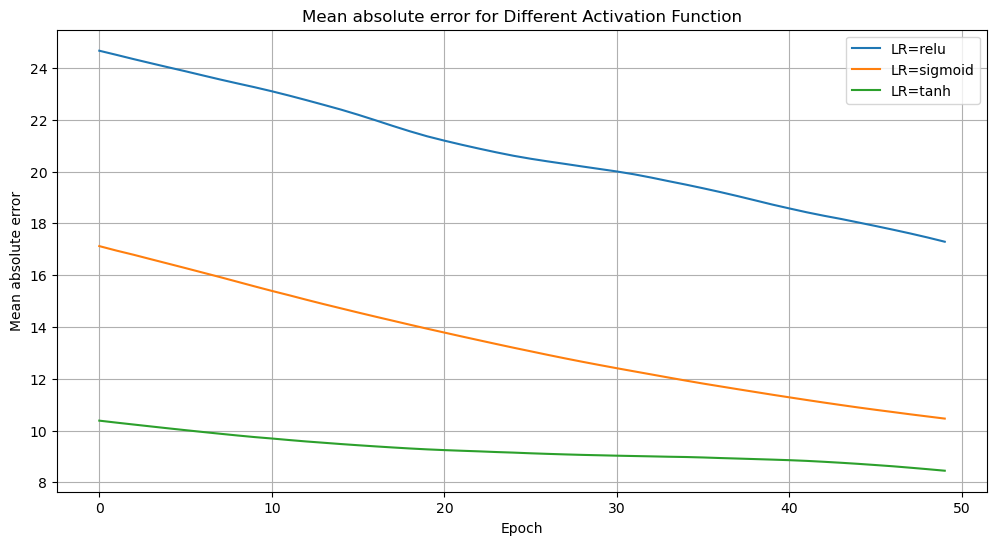

In [55]:
plt.figure(figsize=(12, 6))
for activation_func, history_act in history_dict_act.items():
    plt.plot(history_act.history['mae'], label=f'LR={activation_func}')
plt.xlabel('Epoch')
plt.ylabel('Mean absolute error')
plt.title('Mean absolute error for Different Activation Function')
plt.legend()
plt.grid()
plt.show()

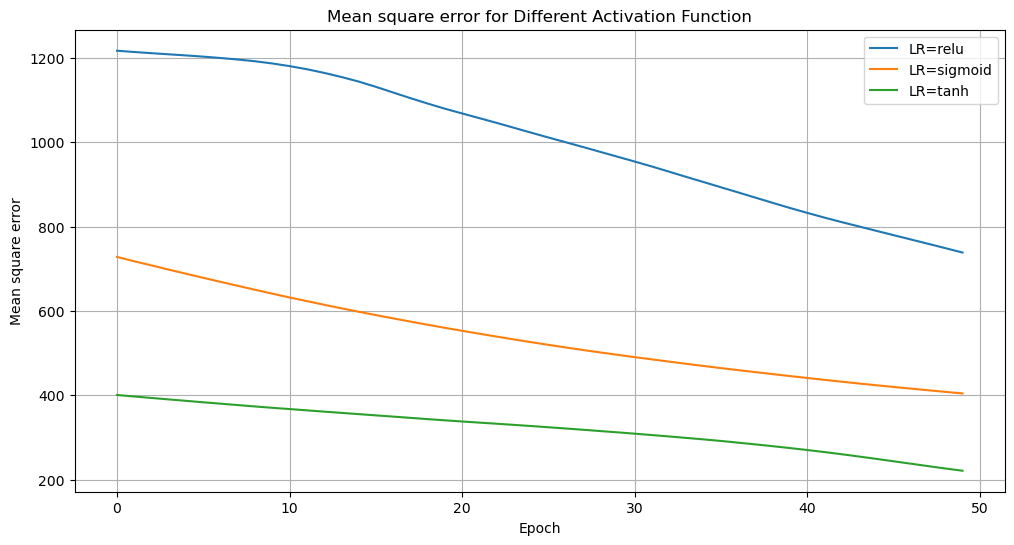

In [56]:
plt.figure(figsize=(12, 6))
for activation_func, history_act in history_dict_act.items():
    plt.plot(history_act.history['mse'], label=f'LR={activation_func}')
plt.xlabel('Epoch')
plt.ylabel('Mean square error')
plt.title('Mean square error for Different Activation Function')
plt.legend()
plt.grid()
plt.show()

## Results with all possible evaluation criteria.

In [57]:
history = lstm.fit(X_train, y_train, epochs=20,  validation_data=(X_test, y_test))

Epoch 1/20
151/151 [==============================] - 4s 19ms/step - loss: 220.7834 - mae: 8.8837 - mse: 220.7834 - val_loss: 458.7714 - val_mae: 18.1790 - val_mse: 458.7714
Epoch 2/20
151/151 [==============================] - 2s 14ms/step - loss: 191.8846 - mae: 8.2674 - mse: 191.8846 - val_loss: 444.9579 - val_mae: 17.7143 - val_mse: 444.9579
Epoch 3/20
151/151 [==============================] - 2s 14ms/step - loss: 183.8776 - mae: 8.0873 - mse: 183.8776 - val_loss: 470.4945 - val_mae: 17.9176 - val_mse: 470.4945
Epoch 4/20
151/151 [==============================] - 2s 14ms/step - loss: 179.1009 - mae: 7.9563 - mse: 179.1009 - val_loss: 382.2109 - val_mae: 16.1081 - val_mse: 382.2109
Epoch 5/20
151/151 [==============================] - 2s 14ms/step - loss: 175.6853 - mae: 7.8484 - mse: 175.6853 - val_loss: 364.3561 - val_mae: 15.5435 - val_mse: 364.3561
Epoch 6/20
151/151 [==============================] - 2s 14ms/step - loss: 169.9333 - mae: 7.7998 - mse: 169.9333 - val_loss: 386.

In [58]:
lstm.save("my_model.h5")

In [59]:
y_pred= lstm.predict(X_test)

16/16 [==============================] - 0s 4ms/step


In [60]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [61]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 11.904883146800445
Mean Squared Error (MSE): 313.0842326410929
Root Mean Squared Error (RMSE): 17.69418640800116
R-squared (R^2): 0.9975901238322958
Mean Absolute Percentage Error (MAPE): 0.007145778005554193


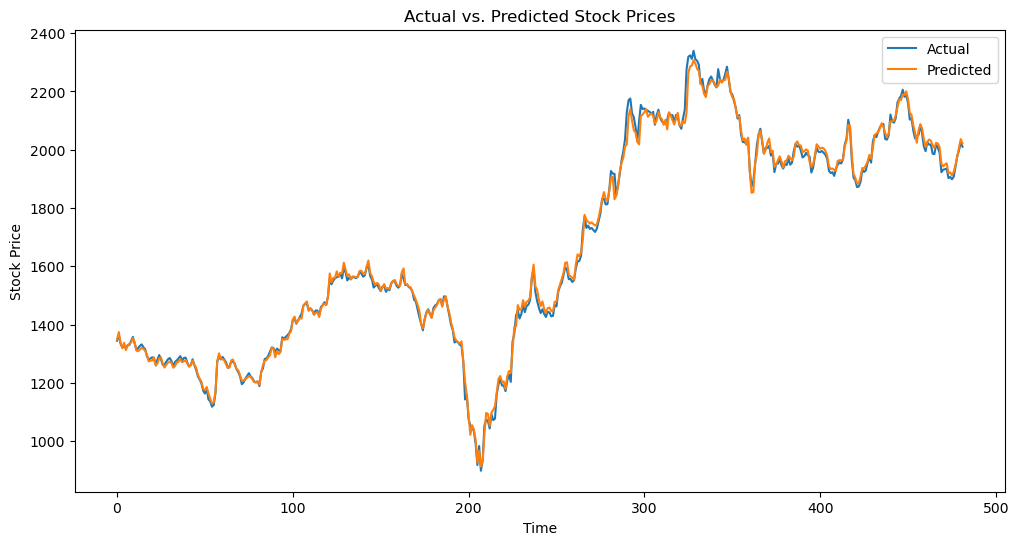

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs. Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

## Learning results in all possible visualizing ways.

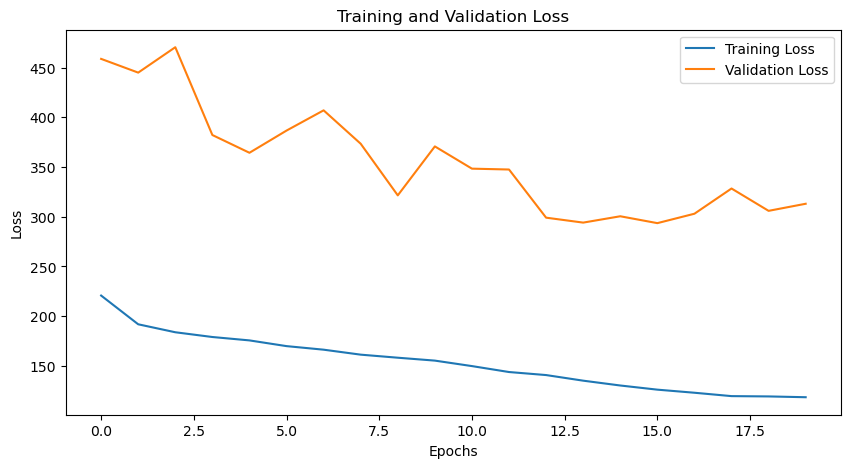

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

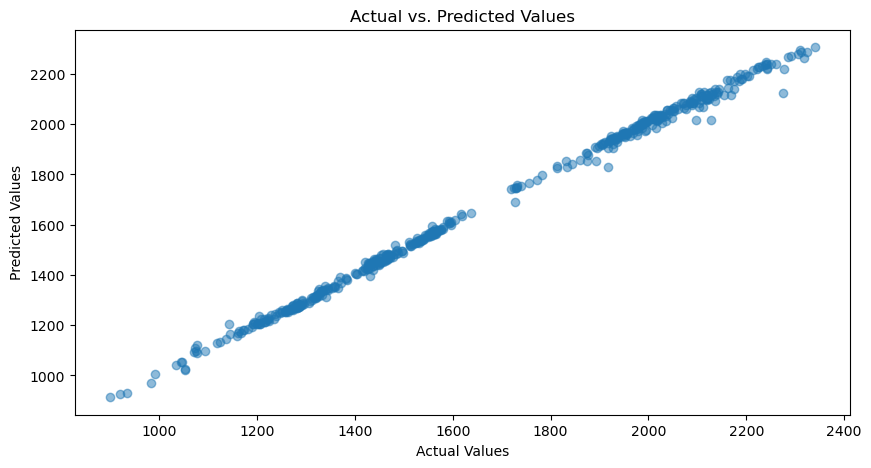

In [64]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Predicting the stock market value

In [78]:
num_data_points = 100
num_time_steps = 10
num_features = 4

In [80]:
synthetic_data = np.random.rand(num_data_points, num_time_steps, num_features)

In [81]:
model = keras.models.load_model('my_model.h5')

In [82]:
scalers = [MinMaxScaler() for _ in range(num_features)]

In [84]:
new_data_preprocessed = np.empty_like(synthetic_data)
for feature_index in range(num_features):
    for time_step in range(num_time_steps):
        data_slice = synthetic_data[:, time_step, feature_index].reshape(-1, 1)
        scalers[feature_index].fit(data_slice)
        new_data_preprocessed[:, time_step, feature_index] = scalers[feature_index].transform(data_slice).flatten()

In [85]:
predicted_values = model.predict(new_data_preprocessed)

ValueError: in user code:

    File "C:\Users\shres\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\shres\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\shres\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\shres\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\shres\anaconda3\envs\tf_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\shres\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 1, 4), found shape=(None, 10, 4)
